# K-Means Clustering: Theory and Fundamentals

Welcome to the first notebook in our K-Means clustering series! In this notebook, we'll cover:

1. What is clustering and unsupervised learning?
2. The K-Means algorithm (Lloyd's algorithm)
3. Mathematical foundations
4. Choosing the optimal number of clusters (K)
5. Assumptions, pitfalls, and limitations

By the end of this notebook, you'll have a solid theoretical understanding of K-Means clustering.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')

print("Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. What is Clustering?

### Machine Learning Paradigms

Machine learning can be broadly categorized into:

**Supervised Learning:**
- You have labeled data (input → output pairs)
- Goal: Learn to predict labels for new data
- Examples: Email spam detection, house price prediction, image classification

**Unsupervised Learning:**
- You have unlabeled data (just inputs, no outputs)
- Goal: Discover hidden patterns or structure in the data
- Examples: Customer segmentation, anomaly detection, data compression

**Clustering** is the most common unsupervised learning task:
> *Group similar data points together, where points in the same group are more similar to each other than to points in other groups.*

### Real-World Applications

| Domain | Application | Why Clustering? |
|--------|-------------|----------------|
| **Marketing** | Customer segmentation | Target different groups with personalized campaigns |
| **Biology** | Gene expression analysis | Find groups of genes with similar behavior |
| **Computer Vision** | Image segmentation | Separate objects from background |
| **E-commerce** | Product recommendations | Group similar products or users |
| **Security** | Anomaly detection | Identify unusual patterns in network traffic |
| **Data Compression** | Reduce data size | Store only cluster representatives |

## 2. The K-Means Algorithm

K-Means is one of the simplest and most popular clustering algorithms. The name comes from:
- **K**: The number of clusters (you choose this)
- **Means**: Each cluster is represented by the mean (average) of its points

### Lloyd's Algorithm (The Standard K-Means)

**Input:** 
- Dataset $X = \{x_1, x_2, ..., x_n\}$ where $x_i \in \mathbb{R}^d$
- Number of clusters $K$

**Algorithm:**

1. **Initialize:** Randomly select $K$ points as initial centroids $\mu_1, \mu_2, ..., \mu_K$

2. **Repeat until convergence:**
   
   **Assignment Step:** Assign each point to the nearest centroid
   $$C_i = \{x_p : \|x_p - \mu_i\| \leq \|x_p - \mu_j\| \text{ for all } j\}$$
   
   **Update Step:** Recompute centroids as the mean of assigned points
   $$\mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x$$

3. **Output:** Final clusters $C_1, C_2, ..., C_K$ and centroids $\mu_1, \mu_2, ..., \mu_K$

### Convergence Criterion

The algorithm stops when:
- Centroids no longer move (or move very little)
- Cluster assignments don't change
- Maximum number of iterations reached

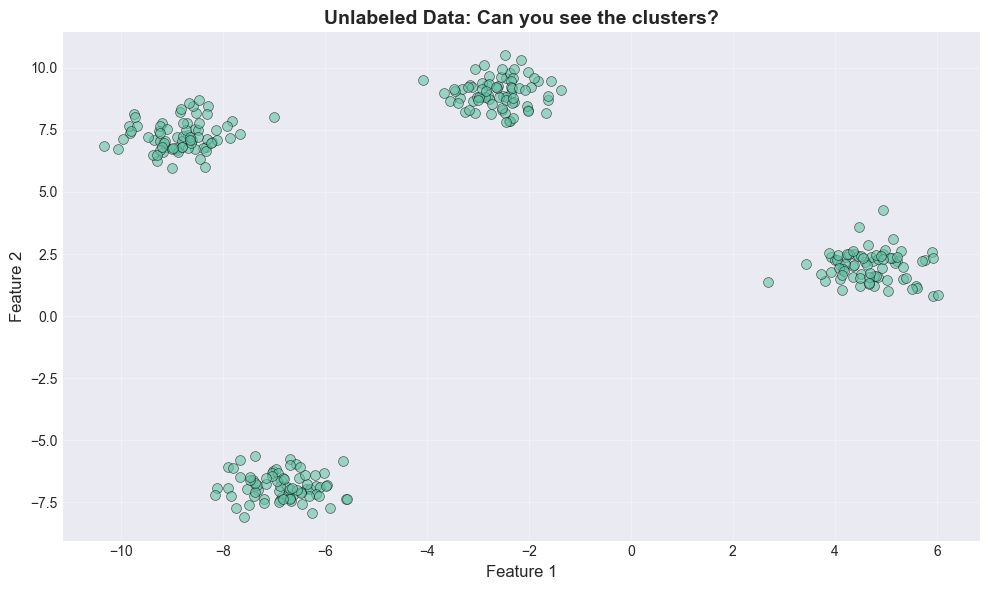

Dataset shape: (300, 2)
Number of samples: 300
Number of features: 2


In [2]:
# Create synthetic data for visualization
np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6, edgecolors='black', linewidths=0.5)
plt.title('Unlabeled Data: Can you see the clusters?', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

### Simple Animation: How K-Means Works

Let's visualize how centroids move during the algorithm's iterations:

In [ ]:
def kmeans_step_by_step(X, K, max_iters=10, random_state=42):
    """Perform K-Means step by step for visualization."""
    np.random.seed(random_state)
    
    # Initialize centroids randomly
    indices = np.random.choice(len(X), K, replace=False)
    centroids = X[indices].copy()
    
    history = [(centroids.copy(), None)]  # Store (centroids, labels)
    
    for iteration in range(max_iters):
        # Assignment step
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        history.append((centroids.copy(), labels.copy()))
        
        # Update step
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
        
        # Check convergence
        if np.allclose(centroids, new_centroids, rtol=1e-4):
            break
        
        centroids = new_centroids
    
    history.append((centroids.copy(), labels.copy()))
    return history

# Run K-Means step by step
K = 4
history = kmeans_step_by_step(X, K, max_iters=10)

print(f"K-Means converged in {len(history)-1} iterations")

✅ K-Means converged in 8 iterations


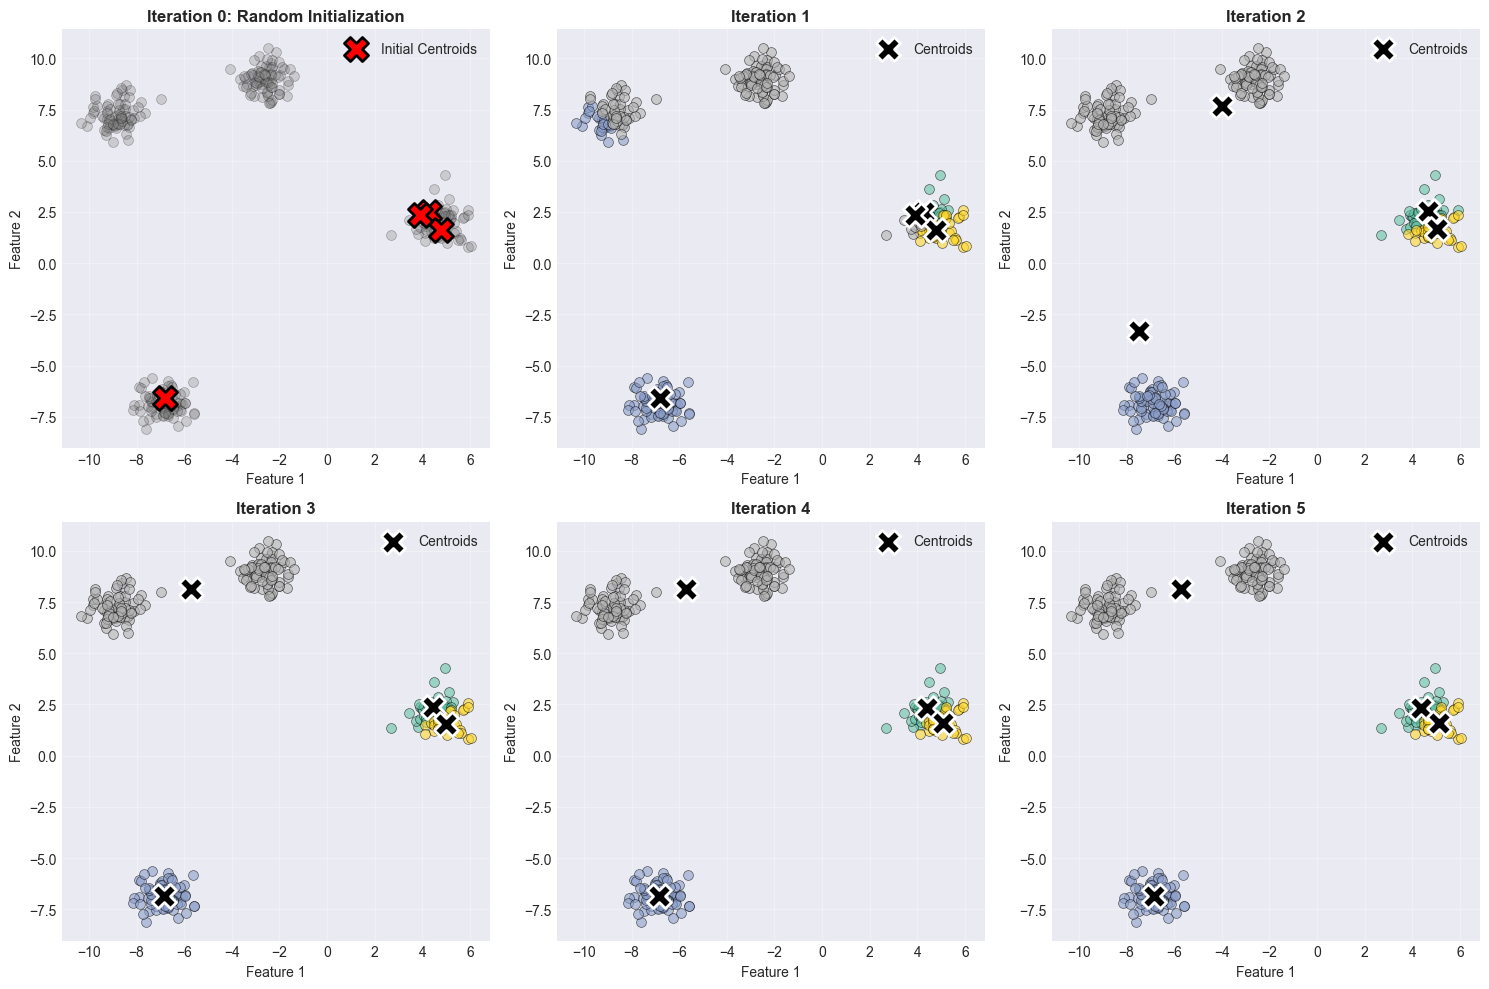

👆 Notice how centroids move toward the center of their assigned clusters!


In [ ]:
# Visualize iterations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

colors = plt.cm.Set2(np.linspace(0, 1, K))

for idx, (centroids, labels) in enumerate(history[:6]):
    ax = axes[idx]
    
    if labels is None:
        # Initial state - no assignments yet
        ax.scatter(X[:, 0], X[:, 1], s=50, alpha=0.3, c='gray', edgecolors='black', linewidths=0.5)
        ax.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', 
                   edgecolors='black', linewidths=2, label='Initial Centroids')
        ax.set_title(f'Iteration 0: Random Initialization', fontsize=12, fontweight='bold')
    else:
        # Assigned clusters
        for k in range(K):
            cluster_points = X[labels == k]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, 
                       c=[colors[k]], alpha=0.6, edgecolors='black', linewidths=0.5)
        
        ax.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X', 
                   edgecolors='white', linewidths=2, label='Centroids')
        ax.set_title(f'Iteration {idx}', fontsize=12, fontweight='bold')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

print("Notice how centroids move toward the center of their assigned clusters!")

## 3. Mathematical Foundations

### Objective Function

K-Means aims to minimize the **Within-Cluster Sum of Squares (WCSS)**, also called **inertia**:

$$
J = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

Where:
- $J$ = total WCSS (lower is better)
- $K$ = number of clusters
- $C_i$ = set of points in cluster $i$
- $x$ = a data point
- $\mu_i$ = centroid of cluster $i$
- $\|x - \mu_i\|^2$ = squared Euclidean distance

**Intuition:** We want points to be as close as possible to their cluster's centroid.

### Convergence Guarantee

**Theorem:** Lloyd's algorithm converges to a local minimum of the WCSS objective.

**Proof sketch:**
1. Each assignment step decreases or maintains WCSS (we assign each point to the nearest centroid)
2. Each update step decreases or maintains WCSS (the mean minimizes squared distances)
3. WCSS is bounded below by 0
4. Therefore, the algorithm must converge

**Important caveat:** K-Means converges to a **local** minimum, not necessarily the **global** minimum. Different initializations can lead to different solutions!

### Distance Metric

Standard K-Means uses **Euclidean distance**:

$$
d(x, y) = \sqrt{\sum_{j=1}^{d} (x_j - y_j)^2}
$$

where $d$ is the number of features.

**Alternative distances** (less common):
- Manhattan distance: $d(x, y) = \sum_{j=1}^{d} |x_j - y_j|$
- Cosine distance: $d(x, y) = 1 - \frac{x \cdot y}{\|x\| \|y\|}$

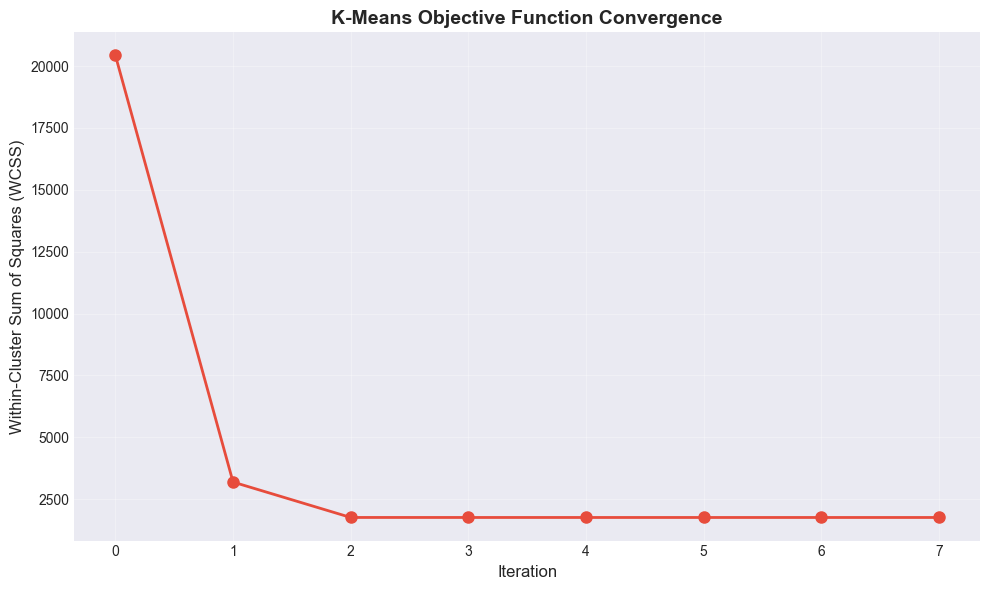

Initial WCSS: 20431.01
Final WCSS: 1755.06
Reduction: 91.4%


In [5]:
# Demonstrate WCSS calculation
def calculate_wcss(X, labels, centroids):
    """Calculate Within-Cluster Sum of Squares."""
    wcss = 0
    for k in range(len(centroids)):
        cluster_points = X[labels == k]
        wcss += np.sum((cluster_points - centroids[k]) ** 2)
    return wcss

# Calculate WCSS for each iteration
wcss_per_iteration = []
for centroids, labels in history:
    if labels is not None:
        wcss = calculate_wcss(X, labels, centroids)
        wcss_per_iteration.append(wcss)

# Plot WCSS convergence
plt.figure(figsize=(10, 6))
plt.plot(range(len(wcss_per_iteration)), wcss_per_iteration, 
         marker='o', linewidth=2, markersize=8, color='#e74c3c')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('K-Means Objective Function Convergence', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Initial WCSS: {wcss_per_iteration[0]:.2f}")
print(f"Final WCSS: {wcss_per_iteration[-1]:.2f}")
print(f"Reduction: {(1 - wcss_per_iteration[-1]/wcss_per_iteration[0])*100:.1f}%")

## 4. Choosing the Optimal K

One of the biggest challenges with K-Means: **you must specify K in advance!**

### Method 1: The Elbow Method

**Idea:** Run K-Means for different values of K and plot the WCSS.

- As K increases, WCSS always decreases (more clusters = better fit)
- But the rate of decrease slows down after a certain point
- The "elbow" in the curve suggests the optimal K

**How to identify the elbow:**
- Look for the point where the curve bends sharply
- After the elbow, adding more clusters doesn't help much

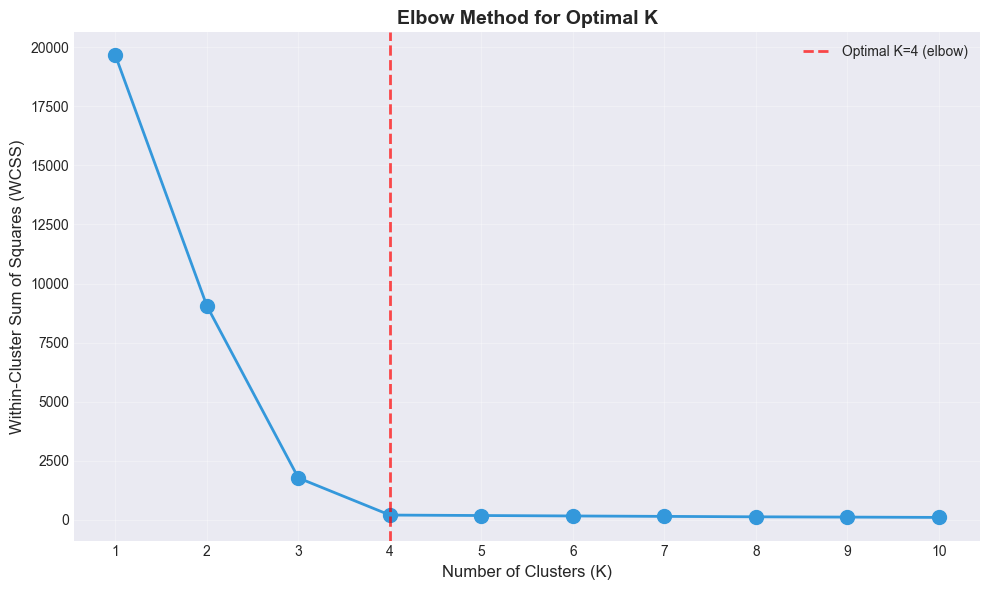

📊 Look for the 'elbow' where the curve bends!
In this case, K=4 seems optimal.


In [ ]:
from sklearn.cluster import KMeans as SklearnKMeans

# Test different values of K
K_range = range(1, 11)
wcss_values = []

for k in K_range:
    kmeans = SklearnKMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss_values, marker='o', linewidth=2, markersize=10, color='#3498db')
plt.axvline(x=4, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Optimal K=4 (elbow)')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.xticks(K_range)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("Look for the 'elbow' where the curve bends!")
print("In this case, K=4 seems optimal.")

### Method 2: Silhouette Score

**Idea:** Measure how similar each point is to its own cluster compared to other clusters.

For each point $i$:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $a(i)$ = average distance to other points in the same cluster
- $b(i)$ = average distance to points in the nearest different cluster

**Interpretation:**
- $s(i) \approx 1$: Point is well-clustered (far from other clusters)
- $s(i) \approx 0$: Point is on the border between clusters
- $s(i) \approx -1$: Point might be in the wrong cluster

**Average silhouette score** across all points: higher is better!

**Typical range:** -1 to +1
- > 0.7: Strong structure
- 0.5 - 0.7: Reasonable structure
- < 0.5: Weak or artificial structure

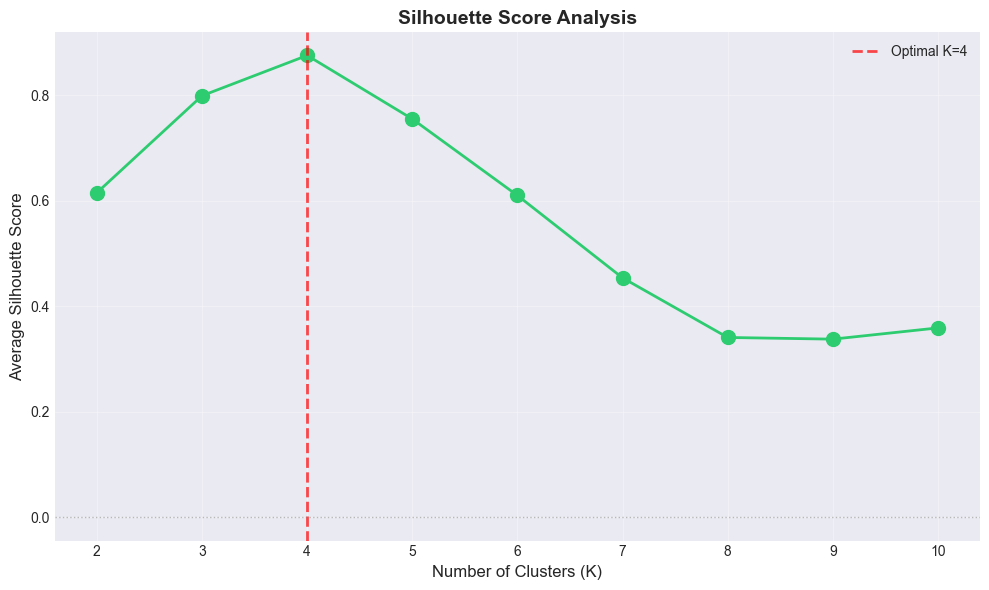

📈 Best K according to silhouette score: 4
Silhouette score at K=4: 0.876


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different K
K_range_sil = range(2, 11)  # Silhouette needs at least 2 clusters
silhouette_scores = []

for k in K_range_sil:
    kmeans = SklearnKMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range_sil, silhouette_scores, marker='o', linewidth=2, markersize=10, color='#2ecc71')
plt.axvline(x=4, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Optimal K=4')
plt.axhline(y=0, color='gray', linestyle=':', linewidth=1, alpha=0.5)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Average Silhouette Score', fontsize=12)
plt.title('Silhouette Score Analysis', fontsize=14, fontweight='bold')
plt.xticks(K_range_sil)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

best_k = list(K_range_sil)[np.argmax(silhouette_scores)]
print(f"Best K according to silhouette score: {best_k}")
print(f"Silhouette score at K={best_k}: {max(silhouette_scores):.3f}")

### Method 3: Domain Knowledge

Sometimes the best choice of K comes from your understanding of the problem:

- **Marketing:** "We want 3-5 customer segments for our campaign"
- **Biology:** "We expect 4 cell types based on prior research"
- **Image compression:** "Use 16 colors for reasonable quality"

**Best practice:** Combine multiple methods!
1. Start with elbow + silhouette to get candidates (e.g., K=3, 4, or 5)
2. Visualize the clusters for each candidate
3. Choose based on domain knowledge and business goals

## 5. Assumptions, Pitfalls, and Limitations

### Assumptions of K-Means

K-Means works best when:

1. **Clusters are spherical (circular/ball-shaped)**
   - Uses Euclidean distance, which assumes equal spread in all directions
   
2. **Clusters have similar sizes**
   - One large cluster and one small cluster can cause problems
   
3. **Clusters have similar densities**
   - Dense vs. sparse clusters can be split incorrectly
   
4. **Features are on similar scales**
   - Always standardize/normalize your data first!

### Common Pitfalls

#### 1. Sensitivity to Initialization
- Random initialization can lead to different results
- **Solution:** Use K-Means++ initialization (covered in next notebook)

#### 2. Outliers
- Outliers can pull centroids away from true cluster centers
- **Solution:** Remove outliers or use robust clustering methods

#### 3. Non-spherical Clusters
- K-Means fails with elongated or irregular shapes
- **Solution:** Use DBSCAN, Gaussian Mixture Models, or spectral clustering

#### 4. Curse of Dimensionality
- In high dimensions, Euclidean distance becomes less meaningful
- **Solution:** Apply PCA or UMAP for dimensionality reduction first

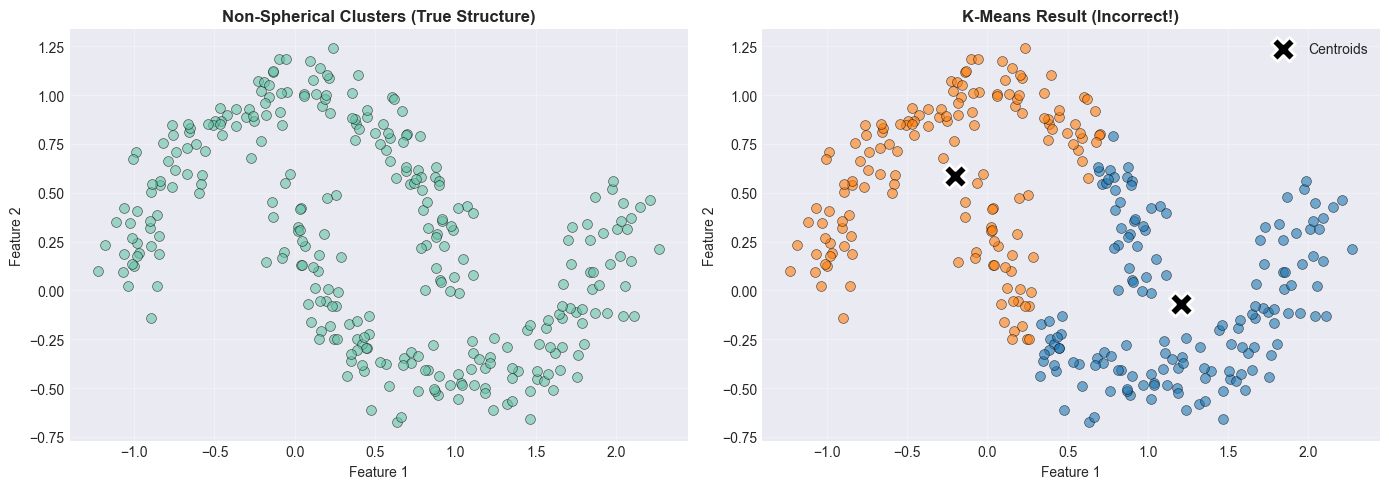

⚠️ K-Means fails when clusters are not spherical!
For such data, consider DBSCAN or spectral clustering instead.


In [ ]:
# Demonstrate failure case: Non-spherical clusters
from sklearn.datasets import make_moons

X_moons, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply K-Means
kmeans_moons = SklearnKMeans(n_clusters=2, random_state=42, n_init=10)
labels_moons = kmeans_moons.fit_predict(X_moons)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# True structure
axes[0].scatter(X_moons[:, 0], X_moons[:, 1], s=50, alpha=0.6, edgecolors='black', linewidths=0.5)
axes[0].set_title('Non-Spherical Clusters (True Structure)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(alpha=0.3)

# K-Means result
colors = ['#1f77b4', '#ff7f0e']
for k in range(2):
    cluster_points = X_moons[labels_moons == k]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, 
                    c=colors[k], alpha=0.6, edgecolors='black', linewidths=0.5)

axes[1].scatter(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1],
                s=300, c='black', marker='X', edgecolors='white', linewidths=2, label='Centroids')
axes[1].set_title('K-Means Result (Incorrect!)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

print("WARNING: K-Means fails when clusters are not spherical!")
print("For such data, consider DBSCAN or spectral clustering instead.")

### When to Use K-Means

**Good for:**
- Large datasets (fast and scalable)
- Exploratory data analysis
- When you have a rough idea of K
- Spherical, well-separated clusters
- Customer segmentation, image compression, data preprocessing

**Not good for:**
- Non-spherical clusters (use DBSCAN, spectral clustering)
- Varying cluster densities (use DBSCAN)
- Unknown K with no clear elbow (use hierarchical clustering)
- High-dimensional sparse data (apply dimensionality reduction first)
- Presence of strong outliers (preprocess or use robust methods)

## Summary

In this notebook, we covered:

1. **What is clustering?** Unsupervised learning to group similar data
2. **Lloyd's algorithm:** Assignment → Update → Repeat
3. **Mathematical foundation:** Minimize WCSS, convergence to local minimum
4. **Choosing K:** Elbow method, silhouette score, domain knowledge
5. **Limitations:** Sensitive to initialization, assumes spherical clusters, affected by outliers

### Next Steps

In **Notebook 02**, we'll:
- Implement K-Means from scratch using NumPy
- Compare our implementation with scikit-learn
- Learn about K-Means++ initialization
- Benchmark performance

---

**Ready to code?** → [02_implementation.ipynb](02_implementation.ipynb)